# Chapter 2: Getting Started with Prophet

## Building a simple model in Prophet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [11]:
# Raw URL of the dataset
url = "https://raw.githubusercontent.com/gzmlab/Forecasting-Time-Series-Data-with-Prophet-Second-Edition/main/data/co2-ppm-daily_csv.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url)

# Converts the 'date' column to datetime format to enable temporal manipulations
df['date'] = pd.to_datetime(df['date'])

# Display the first few rows of the dataset
df.head(5)

         date   value
0  1958-03-30  316.16
1  1958-03-31  316.40
2  1958-04-02  317.67
3  1958-04-03  317.76
4  1958-04-04  317.09


,date,value
0,1958-03-30,316.16
1,1958-03-31,316.40
2,1958-04-02,317.67
3,1958-04-03,317.76
4,1958-04-04,317.09


In [ ]:
# Renames the DataFrame columns to match Prophet's requirements
# 'ds': timestamp column (datetime) - required by Prophet
# 'y': target variable to forecast - required by Prophet
df.columns = ['ds', 'y']

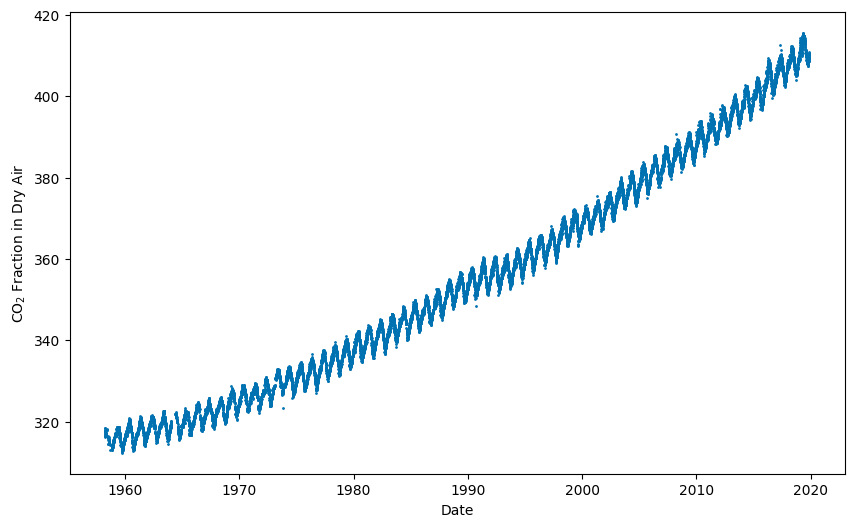

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(pd.to_datetime(df['ds']), df['y'], s=1, c='#0072B2')
plt.xlabel('Date')
plt.ylabel(r'CO$_2$ Fraction in Dry Air')
plt.show()

In [5]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl6qmwbq0/lnw1fu9b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl6qmwbq0/ogkokpgo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88823', 'data', 'file=/tmp/tmpl6qmwbq0/lnw1fu9b.json', 'init=/tmp/tmpl6qmwbq0/ogkokpgo.json', 'output', 'file=/tmp/tmpl6qmwbq0/prophet_model_rtuqm5g/prophet_model-20250415212143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:21:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:22:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [6]:
future = model.make_future_dataframe(periods=365 * 10)
forecast = model.predict(future)

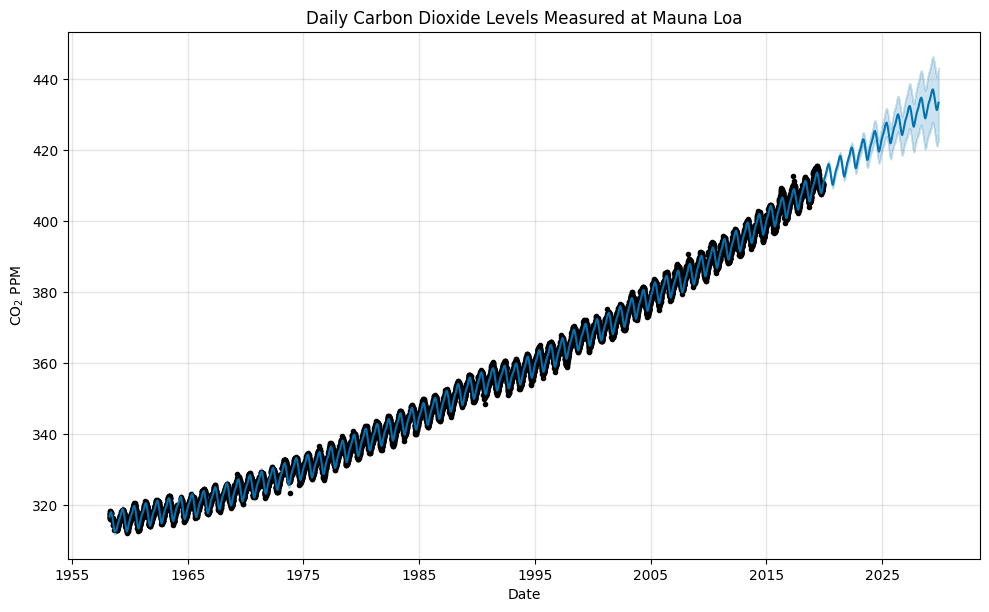

In [10]:
fig = model.plot(forecast, xlabel='Date', ylabel=r'CO$_2$ PPM')
plt.title('Daily Carbon Dioxide Levels Measured at Mauna Loa')
plt.show()

## Interpreting the forecast DataFrame

In [8]:
forecast.head(3).T

,0,1,2
ds,1958-03-30 00:00:00,1958-03-31 00:00:00,1958-04-02 00:00:00
trend,314.87681,314.879212,314.884015
yhat_lower,315.989154,316.031181,316.221007
yhat_upper,317.718955,317.759168,317.81748
trend_lower,314.87681,314.879212,314.884015
trend_upper,314.87681,314.879212,314.884015
additive_terms,1.985679,2.015663,2.118861
additive_terms_lower,1.985679,2.015663,2.118861
additive_terms_upper,1.985679,2.015663,2.118861
weekly,0.003257,-0.010815,0.003454


## Understanding components plots

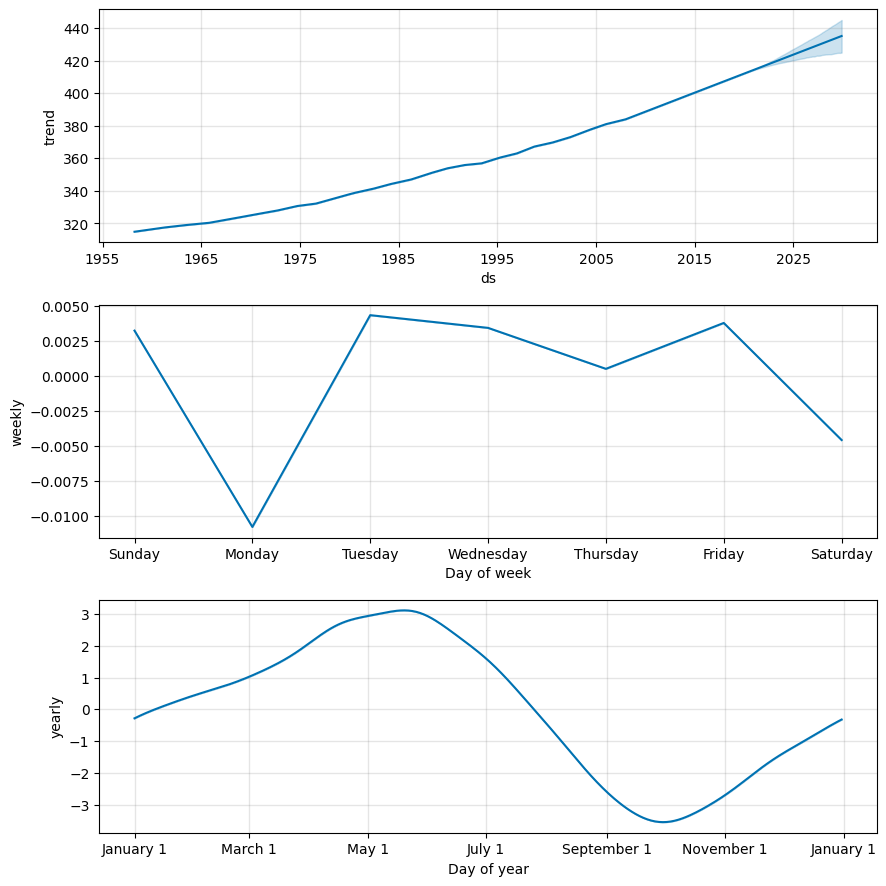

In [9]:
fig2 = model.plot_components(forecast)
plt.show()